In [ ]:
"""! @brief СКБ201 Тур ТВ Методы Программирования ЛР2"""

##
# @mainpage Лабораторная работа номер 2 по курсу "Методы Программирования"
#
# @brief СКБ201 Тур Т.В. Методы Программирования ЛР2
#
# @section intro Введение
# Лабораторная работа номер 2 по курсу "Методы программирования". Выполнена студентом Туром Тимофем Владимировичем группы СКБ201.
#
# @section description Описание
# В данной лабораторной работе тредуется выполнить поиск элементов в массивах, сгенерированных в предыдущей лабораторной работе. Требуется выполнить линейный и бинарный поиск, а также поиск с помощью функции multymap, после чего на графиках сравнить результаты работ для разных размеров массивов.
# Мой вариант - 24. Поиск элементов осуществляется по ключу, которым является первое нечисловое поле объекта из первой лабораторной. В моем случае это поле - ФИО.
#
# @section link Ссылка на репозиторий
# ----- В репозитории github хранятся данный проект: https://github.com/TimothyTur/MP_L2
# В силу явной ненужности многих данных doxygen, они будут отсутствовать там (кроме явно нужных, например как этот отчет).
#
# @section diagram График времени работы сортировок
# ----- На графике отображено время выполнения сортировки в зависимости от числа элементов для сортировок простыми вставками, шейкер и быстрой.
# @image latex mpLab1Graph1.png "График работы сортировок"
# Быстрая сортировка в каждой точке измерения справляется меньше чем за секунду. Мне показалось это странным, но множественные проверки показали что это действительно так и что она реально быстрая. Линяя, соответствующая быстрой сортировке выглядит прямой, но только из-за соотношения по высотам с другими линиями. Хоть и совершенно небольшое, но время у нее тоже есть.
#

##
# @file full_code.py
#
# @brief Основной исполняевый файл лабораторной работы
# 
# @sectioin description Описание
# Лабораторная работа в изначальном свое виде выполнялась в оболочке "jupyter notebook" в силу его удобства для таких целей. Этот файл является прямым последовательным копированием ячеек из итогового документа (также прикрепленного в github), по причине того что doxygen на файлы ".ipynb" не работает

In [1]:
# Imports
import random as rnd
import time
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Основа классовых генераторов в этой лабораторной работе не требуется, так как объекты будут напрямую копироваться из файлов

In [8]:
#класс
class MyObject:
    """! Класс объектов, требуемых по заданию первой лабораторной работы.
    
    В этой лабораторной работе не требуется генерировать новые данные, требуется их только считывать. По этой причине генераторы дат и массивы фамилий удалены, а конструктор упрощен до объявления простого переменных.
    В этой лабораторной работе выполняется поиск по ключу, поэтому имеет смысл переписать метод сравнения, ограничив его только лишь полем этого самого ключа.
    """
    def __init__(self):
        """! Конструктор класса MyObject
        Конструктор класса объявляет переменные, которые в нем есть. Не имеет параметров.
        """
        self.fio, self.num, self.din, self.dou, self.pay = \
            None, None, None, None, None
        
    #key
    @property
    def key(self):
        """! Выделенное свойство класса - ключ
        Свойство созданно выделенным, чтобы в разы упросить обращение к нему, подмену для тестов, в то же время не требуя дополнительных ресурсов.
        """
        return self.fio
    
    #==
    def __eq__(self, other):
        """! Проверка на равенство.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key==other.key
    #>=
    def __ge__(self, other):
        """! Проверка на больше или равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key>=other.key
    #>
    def __gt__(self, other):
        """! Проверка на больше.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key>other.key
    #<=
    def __le__(self, other):
        """! Проверка на меньше или равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key<=other.key
    #<
    def __lt__(self, other):
        """! Проверка на меньше.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key<other.key
    #!=
    def __ne__(self, other):
        """! Проверка на не равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return not(self.__eq__(other))
    
    def __str__(self):
        """! Выводит содержимое класса в строке через пробел.
        
        @return fio, num, din, dou, pay.
        """
        return ' '.join([self.fio, str(self.num),
                         self.din, self.dou, str(self.pay)])
    
    def writeOpenedFile(self, file):
        """! Функция записи образа объекта в открытый файл.
        
        @param file открытый файл, куда будет записан образ.
        """
        file.write(str(self)+'\n')
        
    def readOpenedFile(self, file):
        """! Функция чтения образа объекта с открытого файла.
        
        @param file открытый файл, откуда будет прочтен образ.
        """
        data = file.readline()[:-1].split(' ');
        self.fio = ' '.join(data[0:3])
        self.num = int(data[3])
        self.din = data[4]
        self.dou = data[5]
        self.pay = int(data[6])
        return self
    

In [9]:
#чтение
ns = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
samples = []
for i in range(len(ns)):
    samples.append([])
    with open('mpSample'+str(ns[i])+'.txt', 'r') as file:
        for j in range(ns[i]):
            samples[i].append(MyObject().readOpenedFile(file))

In [10]:
#проверка сортированности
def isSorted(mass):
    """! Функция, проверяющая отсортированность массива на меньше или равно.
    
    @param mass Массив для проверки.
    
    @return bool
    """
    for i in range(len(mass)-1):
        if mass[i]>mass[i+1]:
            return False
    return True

In [11]:
#быстрая сортировка
def myQuickSort(mass, lb=0, ub=None):
    """! Быстрая сортировка
    В лабораторной работе одной из проверок для бинарного поиска является поиск после сортировки данного массива. В задании указано использовать для этого наиболее эффективный методом из работы 1, что случилось быть быстрой сортировке.
    
    @param mass Массив к сортировке
    @param lb   Нижняя граница сортировки (по умолчанию 0)
    @param ub   Верхняя граница сортировки (по умолчанию len(mass)-1)
    """
    if(ub==None):
        ub = len(mass)-1
    def _myQuickSort(mass, lb, ub):
        if(lb>=ub): return
        devider = lb
        for i in range(lb+1, ub+1):
            if(mass[i]<=mass[lb]):
                devider+=1
                mass[i], mass[devider] = mass[devider], mass[i]
        mass[devider], mass[lb] = mass[lb], mass[devider]
        _myQuickSort(mass, lb, devider-1)
        _myQuickSort(mass, devider+1, ub)
    return _myQuickSort(mass, lb, ub)

In [12]:
#создание заранее отсортированного массива
sorted_ = deepcopy(samples)
for i in range(len(ns)):
    myQuickSort(sorted_[i])
    print(isSorted(sorted_[i]))

True
True
True
True
True
True
True
True
True


In [13]:
#сохранение отсортированного массива
for i in range(len(ns)):
    with open('mpSorted'+str(ns[i])+'.txt', 'w') as file:
        for j in range(ns[i]):
            sorted_[i][j].writeOpenedFile(file)

In [14]:
#линейный поиск
def linearSearch(mass, key):
    res = []
    for i in range(len(mass)):
        if(mass[i].key() == key): res.append(i)
    return res

In [70]:
#бинарный поиск
#не проверяет массив на изначальную сортировку
def binarySearch(mass, key):
    start = 0
    end = len(mass)
    elem = end//2
    while(True):
        print(elem, mass[elem].key())
        if mass[elem].key()==key : break
        elif mass[elem].key()<key:
            end = elem - 1
        else:
            start = elem + 1
        if start > end : break
        elem = start+(end-start)//2
    if mass[elem].key()!=key : return []
    for i in range(elem-1, -1, -1):
        if mass[i].key()!=key:
            start = i+1
            break
    for i in range(elem+1, len(mass), 1):
        if mass[i].key()!=key:
            end = i
            break
    return range(start, end)

In [29]:
#замеряем время
#прямой, бинарный, сортировка и бинарный, multimap
t = [[-1]*len(ns)]*4
start = -1
myKey = [rnd.choice(samples[i]).key() for i in range(len(ns))]
print(myKey)

['Смирнов Гор Константинович', 'Парфенюк Илья Сергеевич', 'Кузьмина Елизавета Витальевич', 'Осипова Илья Павлович', 'Магамедов Александр Евгеньевич', 'Кашинцев Роман Ашотович', 'Зильберштейн Григорий Ашотович', 'Коников Тимофей Вадимович', 'Фролов Артём Александровна']


In [34]:
#прямой
for i in range(len(ns)):
    start = time.time()
    res = linearSearch(samples[i], myKey[i])
    t[0][i] = time.time() - start
    print(ns[i], res)
    for j in range(len(res)):
        print(j, res[j], samples[i][res[j]])

100 [80]
0 80 Смирнов Гор Константинович 16 2009/01/31 2009/12/30 17431
500 [58]
0 58 Парфенюк Илья Сергеевич 47 2005/05/05 2012/04/23 85309
1000 [638]
0 638 Кузьмина Елизавета Витальевич 66 2007/03/08 2014/03/09 80417
2000 [1089]
0 1089 Осипова Илья Павлович 66 2004/06/24 2008/09/17 53523
5000 [3729]
0 3729 Магамедов Александр Евгеньевич 96 2008/04/14 2012/12/21 35534
10000 [1680]
0 1680 Кашинцев Роман Ашотович 48 2008/01/15 2008/09/08 24505
20000 [4398, 8506, 12321]
0 4398 Зильберштейн Григорий Ашотович 90 2008/01/09 2011/04/23 98910
1 8506 Зильберштейн Григорий Ашотович 51 2006/10/27 2011/01/20 10189
2 12321 Зильберштейн Григорий Ашотович 58 2011/04/10 2011/12/22 49471
50000 [23540, 45011]
0 23540 Коников Тимофей Вадимович 24 2009/08/15 2014/03/02 71943
1 45011 Коников Тимофей Вадимович 49 2007/10/20 2010/05/23 26434
100000 [6350, 24632, 31641, 45373, 45910, 59741, 73605, 78003, 80469]
0 6350 Фролов Артём Александровна 2 2008/04/16 2012/01/31 91991
1 24632 Фролов Артём Александровна

In [71]:
#бинарный
for i in range(len(ns)):
    start = time.time()
    res = binarySearch(sorted_[i], myKey[i])
    t[1][i] = time.time() - start
    print(ns[i], res)
    for j in range(len(res)):
        print(j, res[j], sorted_[i][res[j]])

50 Тур Анастасия Семенович
75 Ушаков Ксения Юрьевич
88 Яськов Александр Эдуардович
94 Кузьмина Радомир Эдуардович
91 Осипова Ростислав Николаевич
89 Недомолкин Елизавета Эдикович
100 []
250 Кузьмина Мурат Юрьевич
124 Недомолкин Олег Григорьевна
61 Коников Андрей Сергеевич
30 Богов Анастасия Мирзоевич
14 Зильберштейн Тимофей Александрович
6 Коников Тимофей Семенович
2 Ушаков Артур Юрьевич
4 Абдуллабеков Татьяна Сергеевич
3 Зильберштейн Гор Денисович
500 []
500 Богов Олег Константинович
249 Сарибекян Григорий Сергеевич
374 Тур Артём Эдикович
437 Магамедов Данила Игоревич
468 Осипова Илья Сергеевич
484 Черников Никита Константинович
492 Григорьян Артём Владимирович
488 Кашинцев Тимофей Сергеевич
486 Ушаков Татьяна Алексеевич
487 Кашинцев Андрей Олегович
1000 []
1000 Онищенко Ксения Владимирович
499 Магамедов Анастасия Русланович
249 Никитченко Павел Николаевич
124 Тур Никита Григорьевна
186 Осипова Олег Николаевич
217 Парфенюк Александр Олегович
233 Яськов Роман Павлович
241 Гришаев Алекс

In [69]:
myKey[0] < sorted_[0][50].key()

True

In [60]:
for i in range(ns[0]):
    print(i, sorted_[0][i])

0 Кузьмина Александр Владимирович 91 2004/01/13 2006/02/23 55954
1 Красов Максим Андреевич 31 2004/01/24 2009/03/31 13284
2 Кузьмина Григорий Александровна 48 2004/03/11 2007/03/06 82039
3 Фролов Ксения Сергеевич 43 2004/03/21 2014/03/24 86421
4 Самунин Александр Сергеевич 95 2004/04/14 2004/06/08 43400
5 Тур Артём Денисович 80 2004/06/09 2010/09/03 54327
6 Сарибекян Илья Сергеевич 80 2004/06/25 2004/10/27 33259
7 Черников Олег Сергеевич 38 2004/07/01 2014/01/25 7323
8 Онищенко Илья Сергеевич 31 2004/07/09 2013/03/20 64400
9 Тур Радомир Константинович 9 2004/08/15 2008/04/08 76434
10 Григорьян Олег Мугутдинович 99 2004/09/01 2014/07/13 68253
11 Недомолкин Александр Николаевич 21 2004/09/14 2009/12/23 94791
12 Самунин Михаил Александрович 26 2004/09/17 2007/12/04 54605
13 Ушаков Елизавета Андреевич 20 2004/10/19 2005/08/12 90175
14 Богов Никита Николаевич 10 2004/11/09 2014/11/01 86025
15 Абдуллабеков Ростислав Денисович 51 2004/11/09 2009/09/07 80902
16 Ташлыков Никита Дмитриевна 29 20

In [46]:
#графики

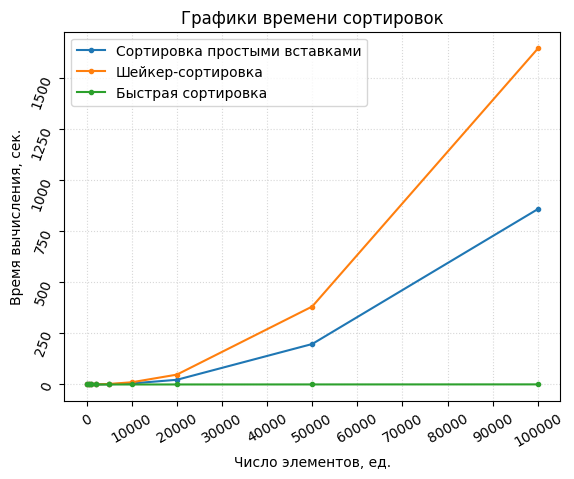

In [73]:
plt.plot(ns, t[0], marker='.')
plt.plot(ns, t[1], marker='.')
plt.plot(ns, t[2], marker='.')
plt.xticks(np.arange(0, 100001, 10000), rotation=30)
plt.yticks(rotation=70)
plt.xlabel("Число элементов, ед.")
plt.ylabel("Время вычисления, сек.")
plt.title("Графики времени сортировок")
plt.legend(["Сортировка простыми вставками",
            "Шейкер-сортировка", "Быстрая сортировка"],
           loc = "upper left")
plt.grid(True, alpha = 0.5, ls = "dotted")

plt.savefig('mpLab1Graph1.png', bbox_inches='tight')